In [25]:
# Importing the libraries required
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
#Loading the dataset for analysis
df=pd.read_excel("DoctorVisits.xlsx")

In [27]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


# Understanding dataset

Format Data containing 5,190 observations on 12 variables.

    visits:    Number of doctor visits in past 2 weeks.

    gender:    Factor indicating gender.

    age:       Age in years divided by 100.

    income:    Annual income in tens of thousands of dollars.

    illness:   Number of illnesses in past 2 weeks.

    reduced:   Number of days of reduced activity in past 2 weeks due to illness or injury.

    health:    General health questionnaire score using Goldberg's method.

    private:   Factor. Does the individual have private health insurance?

    freepoor:  Factor. Does the individual have free government health insurance due to low income?

    freerepat: Factor. Does the individual have free government health insurance due to old age, disability or veteran status?

    nchronic:  Factor. Is there a chronic condition not limiting activity?
    
    lchronic:  Factor. Is there a chronic condition limiting activity?
    
    
    
    Note: The General Health Questionnaire (GHQ) score using Goldberg's method signifies the individual's level of psychological
    
    distress or emotional well-being. The higher the GHQ score, the higher the likelihood that the individual is experiencing
    
    psychological distress or emotional problems. Conversely, a lower GHQ score suggests a lower level of psychological  
    
    distress and better emotional well-being.

       Higher GHQ Score → Higher Psychological Distress
       Lower GHQ Score → Lower Psychological Distress

In [28]:
#Knowing the variable data types
df.dtypes

Unnamed: 0      int64
visits          int64
gender         object
age           float64
income        float64
illness         int64
reduced         int64
health          int64
private        object
freepoor       object
freerepat      object
nchronic       object
lchronic       object
dtype: object

In [29]:
#data type information about the data
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


In [30]:
#Statistical description of data
df.describe()

,Unnamed: 0,visits,age,income,illness,reduced,health
count,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000,5190.000000
mean,2595.500000,0.301734,0.406385,0.583160,1.431985,0.861850,1.217534
std,1498.368279,0.798134,0.204782,0.368907,1.384152,2.887628,2.124266
min,1.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000
25%,1298.250000,0.000000,0.220000,0.250000,0.000000,0.000000,0.000000
50%,2595.500000,0.000000,0.320000,0.550000,1.000000,0.000000,0.000000
75%,3892.750000,0.000000,0.620000,0.900000,2.000000,0.000000,2.000000
max,5190.000000,9.000000,0.720000,1.500000,5.000000,14.000000,12.000000


## Data cleaning and data preparation

In [31]:
#Checking whether there is null values or not.
df.isnull().sum()

Unnamed: 0    0
visits        0
gender        0
age           0
income        0
illness       0
reduced       0
health        0
private       0
freepoor      0
freerepat     0
nchronic      0
lchronic      0
dtype: int64

In [32]:
# Replacing the necessary columns values with the boolean values 0 and 1
# YES -> 1
# NO -> 0
df=df.replace(["yes","no"],[1,0])

In [33]:
df.head(3)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,1,0,0,0,0
1,2,1,female,0.19,0.45,1,2,1,1,0,0,0,0
2,3,1,male,0.19,0.90,3,0,0,0,0,0,0,0


In [34]:
#Changing the price and income columns into orignal values
df['age']=df['age']*100
df['income']=df['income']*100

In [35]:
#Conversion of age to integer data type from float 
df['age']=df['age'].astype(int)
df.head(3)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,19,55.0,1,4,1,1,0,0,0,0
1,2,1,female,19,45.0,1,2,1,1,0,0,0,0
2,3,1,male,19,90.0,3,0,0,0,0,0,0,0


In [36]:
#Removing the useless columns.
df=df.drop("Unnamed: 0",axis=1)

In [37]:
df.head()

,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,female,19,55.0,1,4,1,1,0,0,0,0
1,1,female,19,45.0,1,2,1,1,0,0,0,0
2,1,male,19,90.0,3,0,0,0,0,0,0,0
3,1,male,19,15.0,1,0,0,0,0,0,0,0
4,1,male,19,45.0,2,5,1,0,0,0,1,0


In [38]:
#Couting number of males and females
df["gender"].value_counts()

female    2702
male      2488
Name: gender, dtype: int64

## Data Visualizations

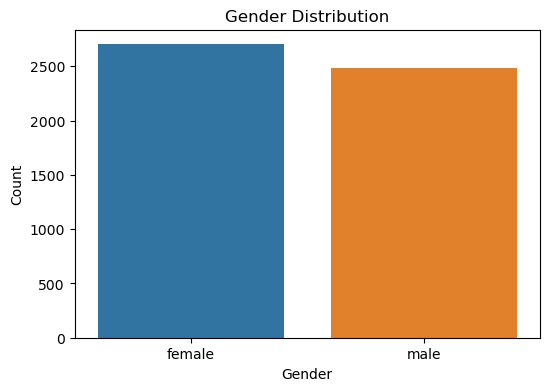

In [39]:
#Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

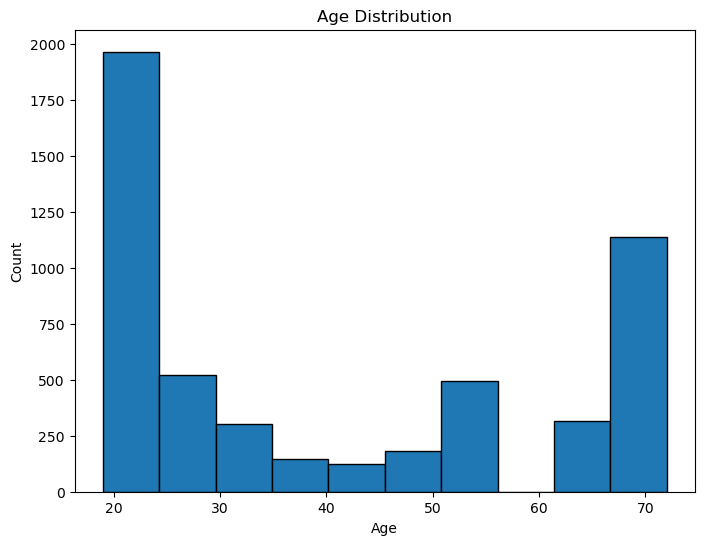

In [40]:
#age distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['age'], bins=10, edgecolor='black')
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.show()

[Text(0.5, 1.0, 'Income of people')]

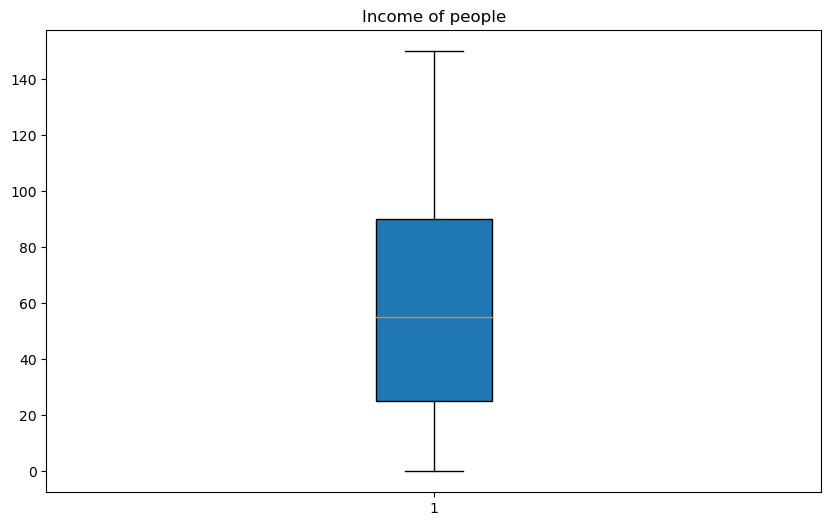

In [41]:
#Income analysis
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(df["income"],patch_artist=True);
ax.set(title="Income of people")

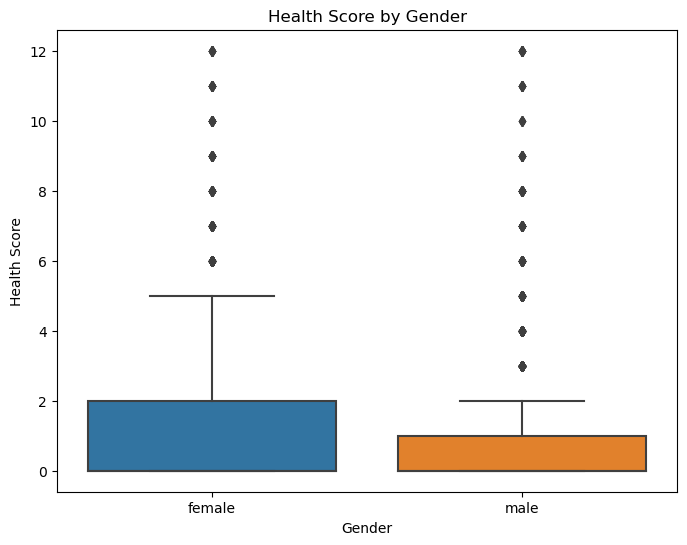

In [42]:
#Variation of health score by gender 
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='health', data=df)
plt.title('Health Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Health Score')
plt.show()

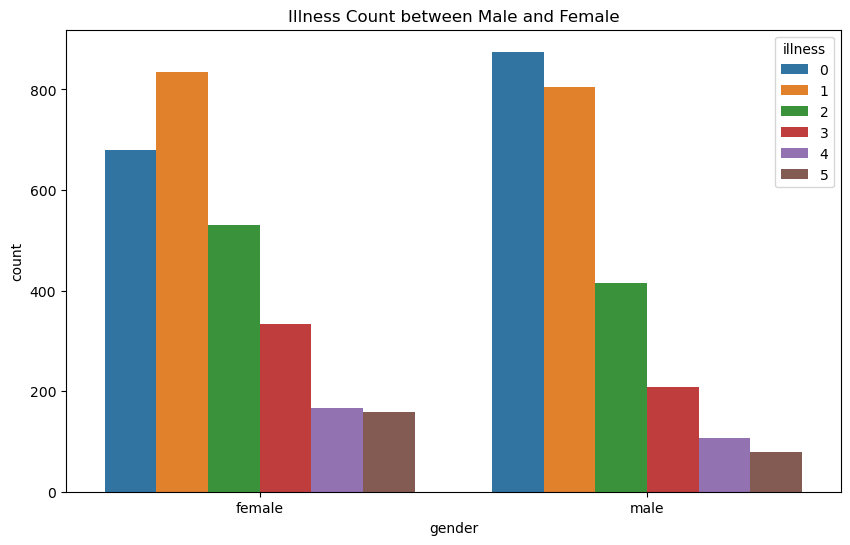

In [43]:
#Illness Count between over gender distribution
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='illness', data=df)

plt.title('Illness Count between Male and Female')
plt.show()

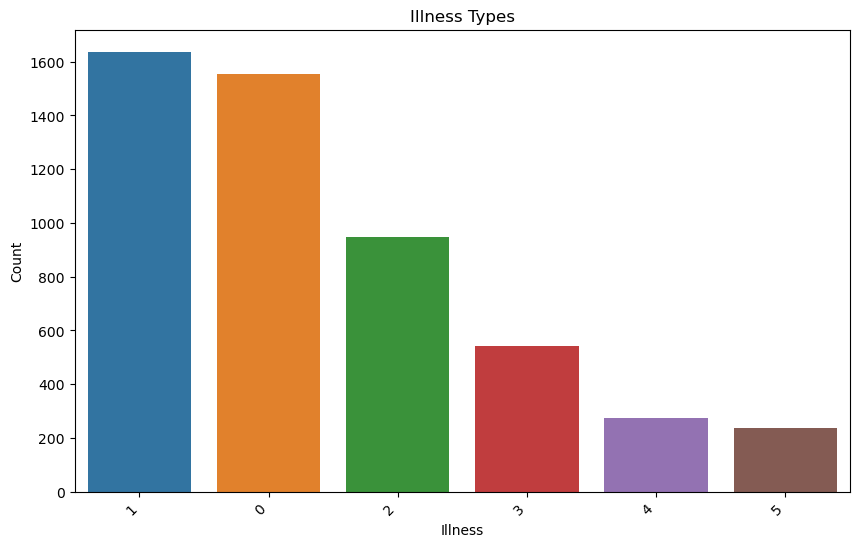

In [44]:
#count plot according to illness types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='illness', order=df['illness'].value_counts().index)
plt.title('Illness Types')
plt.xlabel('Illness')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

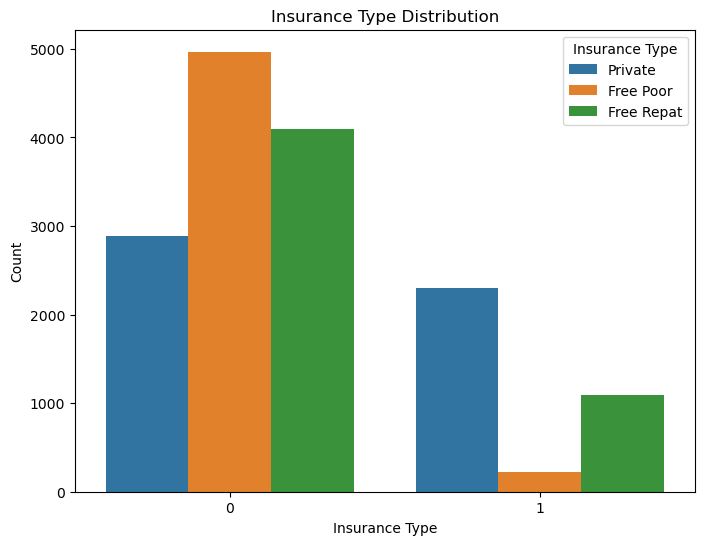

In [45]:
#count plot for insurence type
insurance_cols = ['private', 'freepoor', 'freerepat']
plt.figure(figsize=(8, 6))
sns.countplot(x=pd.melt(df[insurance_cols])['value'], hue=pd.melt(df[insurance_cols])['variable'])
plt.title('Insurance Type Distribution')
plt.xlabel('Insurance Type')
plt.ylabel('Count')
plt.legend(title='Insurance Type', loc='upper right', labels=['Private', 'Free Poor', 'Free Repat'])
plt.show()

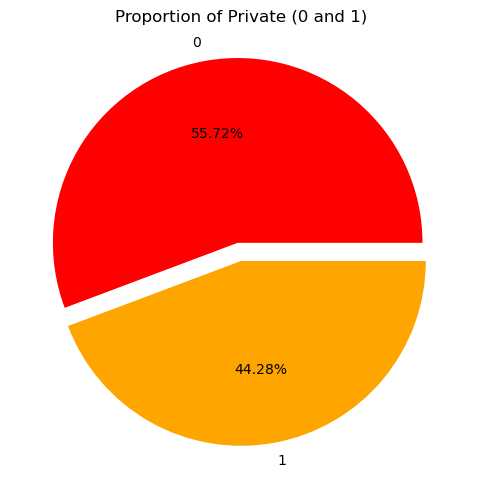

In [46]:
#Proportions of people having free insurence
private_counts = df['private'].value_counts()
fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1, 0) 
colors=["red","orange"]
ax.pie(private_counts.values, labels=private_counts.index, colors=colors, explode=explode, autopct='%1.2f%%')
ax.set_title('Proportion of Private (0 and 1)');

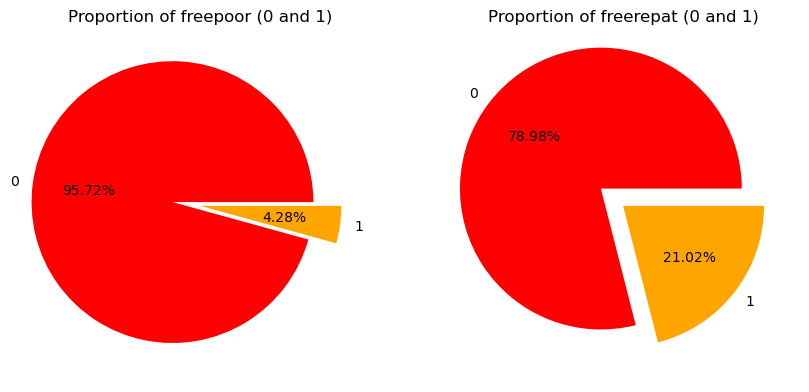

In [47]:
#Proportions of people having free insurence due to low economic and old age, disability or veteran statu
freepoor_counts = df['freepoor'].value_counts()
freerepat_counts = df['freerepat'].value_counts()
explode = (0.2, 0) 
colors=["red","orange"]

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10, 6))
ax1.pie(freepoor_counts.values, labels=freepoor_counts.index, colors=colors, explode=explode, autopct='%1.2f%%')
ax1.set_title('Proportion of freepoor (0 and 1)');

ax2.pie(freerepat_counts.values, labels=freerepat_counts.index, colors=colors, explode=explode, autopct='%1.2f%%')
ax2.set_title('Proportion of freerepat (0 and 1)');

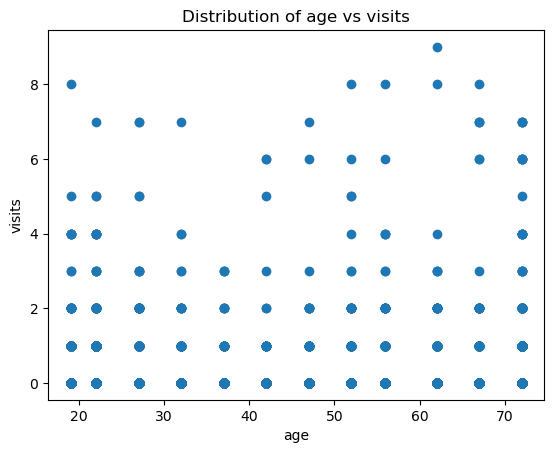

In [48]:
#Distribution of age vs visits
fig,ax=plt.subplots()
ax.scatter(df["age"],df["visits"])
ax.set(title="Distribution of age vs visits",
       xlabel="age",
       ylabel="visits");

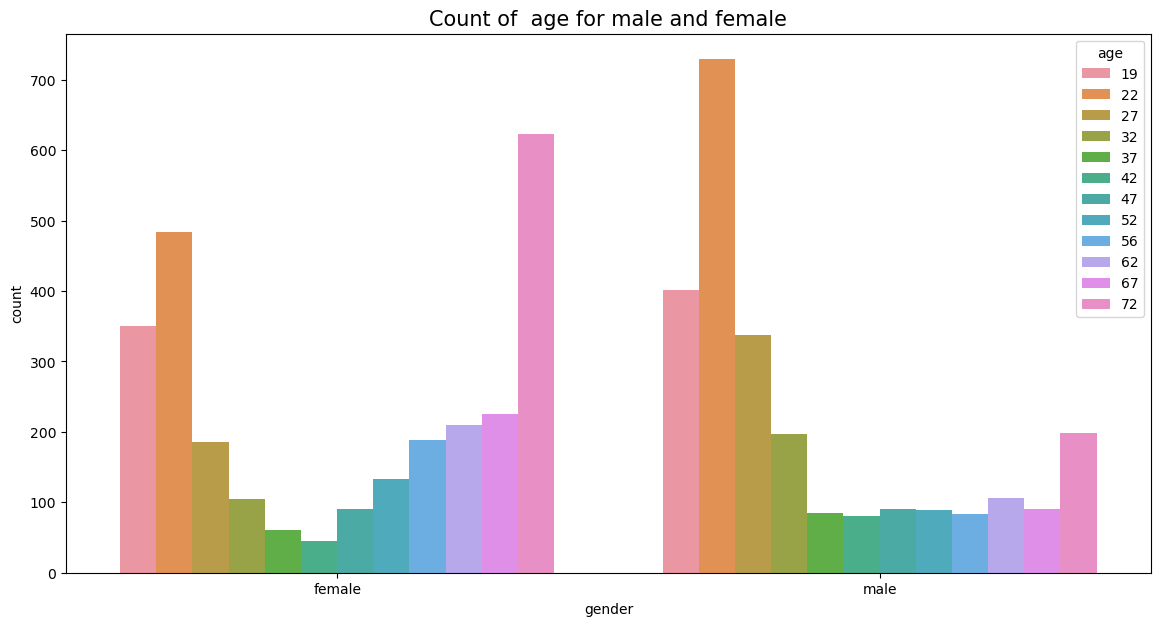

In [49]:
#Plot for Count of  age for male and female
plt.figure(figsize=(14,7))
sns.countplot(x='gender', hue='age', data=df)

plt.title('Count of  age for male and female', size=15)
plt.show()

In [50]:
#grouping data set based on age values
df1=df.groupby("age").sum()
df1

,visits,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
age,,,,,,,,,,
19,160,31459.0,938,391,892,256,82,7,176,40
22,244,78958.0,1452,743,1332,571,86,14,351,81
27,135,44301.0,595,390,623,261,22,14,160,55
32,73,28087.0,368,209,448,180,6,7,110,32
37,36,12957.0,188,181,205,94,1,7,42,24
42,40,10609.0,152,140,146,61,9,11,44,26
47,49,13539.0,238,100,205,114,3,19,80,27
52,92,14869.0,357,271,299,109,4,60,109,46
56,109,14283.0,478,290,388,129,5,93,135,56


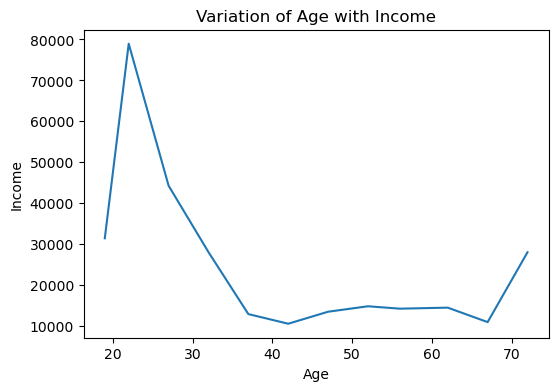

In [51]:
#VVariation of Age vs Income
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(df1.index,df1["income"]);
ax.set(title="Variation of Age with Income",
      xlabel="Age",
      ylabel="Income");

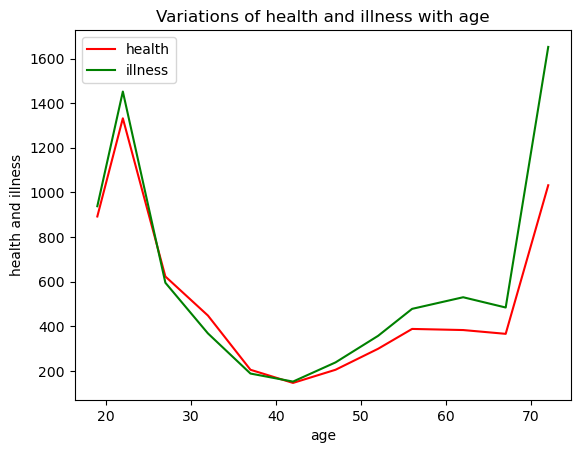

In [52]:
#Variation of age with health and illness 
fig,ax=plt.subplots()
ax.plot(df1.index,df1["health"],color="red")
ax.plot(df1.index,df1["illness"],color="green")
ax.legend(["health","illness"]);
ax.set(title="Variations of health and illness with age",
      xlabel="age",
      ylabel="health and illness");

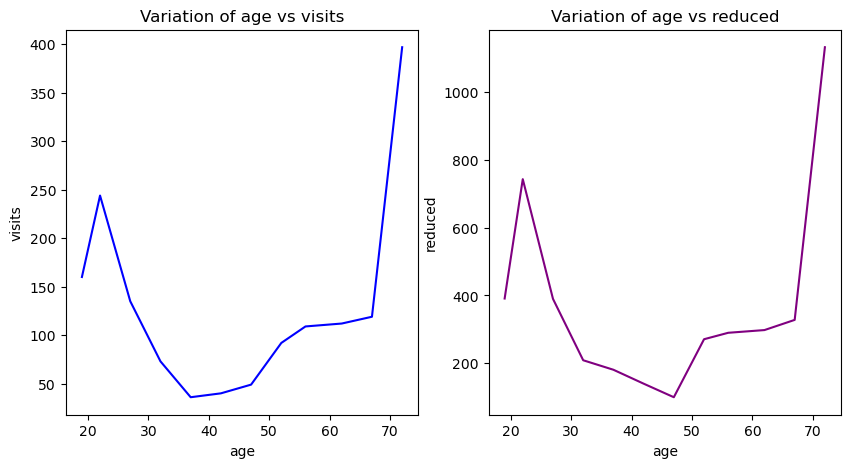

In [53]:
#Distribution of age with no.of visits of doctor and reduced
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax1.plot(df1.index,df1["visits"],color="blue")
ax1.set(title="Variation of age vs visits",
       xlabel="age",
       ylabel="visits")

ax2.plot(df1.index,df1["reduced"],color="purple")
ax2.set(title="Variation of age vs reduced",
       xlabel="age",
       ylabel="reduced");

In [54]:
df2=df.groupby("gender").sum()
df2

,visits,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
gender,,,,,,,,,,,
female,978,124542,131115.0,4353,2636,3606,1269,84,817,1285,340
male,588,86099,171545.0,3079,1837,2713,1029,138,274,807,265


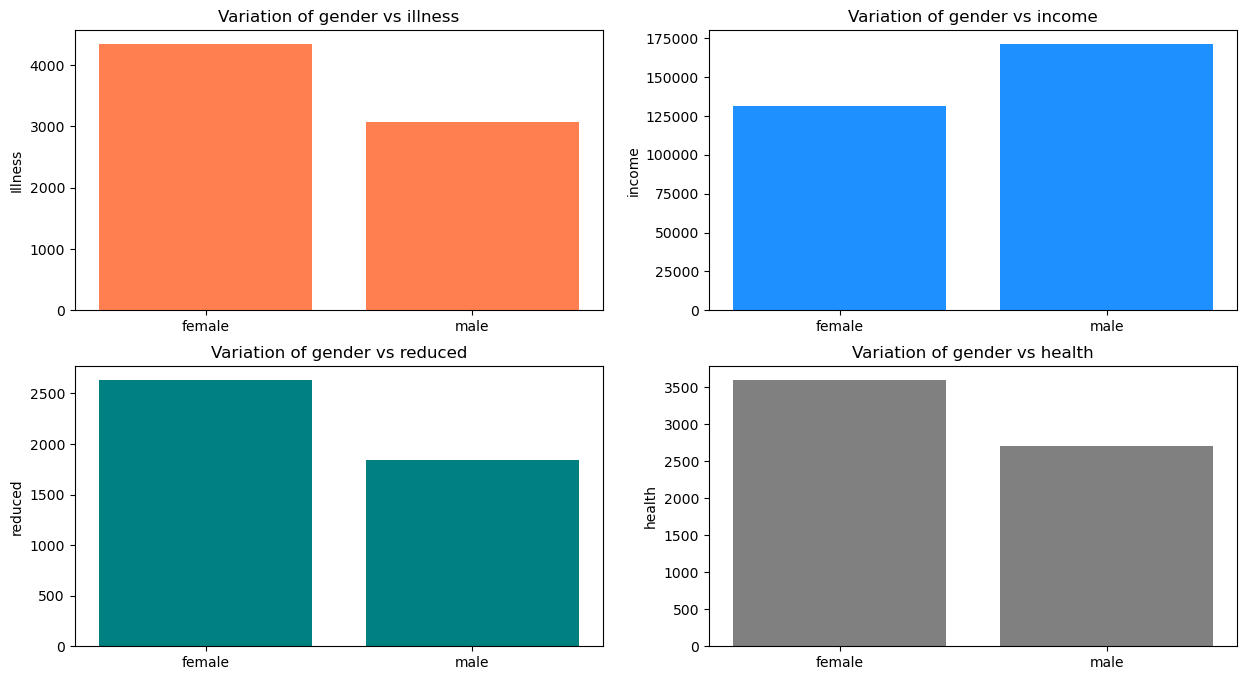

In [55]:
#Distribution of gender over illness,income,reduced and health
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,8))
ax1.bar(df2.index,df2["illness"],color="coral")
ax1.set(title="Variation of gender vs illness",
       ylabel="Illness")
ax2.bar(df2.index,df2["income"],color="dodgerblue")
ax2.set(title="Variation of gender vs income",
       ylabel="income") 
ax3.bar(df2.index,df2["reduced"],color="teal") 
ax3.set(title="Variation of gender vs reduced",
       ylabel="reduced") 
ax4.bar(df2.index,df2["health"],color="grey")
ax4.set(title="Variation of gender vs health",
       ylabel="health");

In [56]:
df3=df.groupby("health").sum()
df3

,visits,age,income,illness,reduced,private,freepoor,freerepat,nchronic,lchronic
health,,,,,,,,,,
0,603,122441,183380.0,3087,971,1385,98,578,1158,236
1,276,33165,47954.0,1330,881,363,43,186,357,91
2,170,18014,23693.0,870,617,192,29,99,200,69
3,114,11066,15786.0,628,360,121,12,55,120,53
4,100,7808,10305.0,385,335,75,11,51,78,42
5,70,5384,6893.0,320,210,51,5,35,58,22
6,65,4215,5124.0,256,319,38,7,22,45,24
7,56,2810,2873.0,165,250,23,3,23,19,22
8,20,1703,2007.0,105,118,17,5,10,16,12


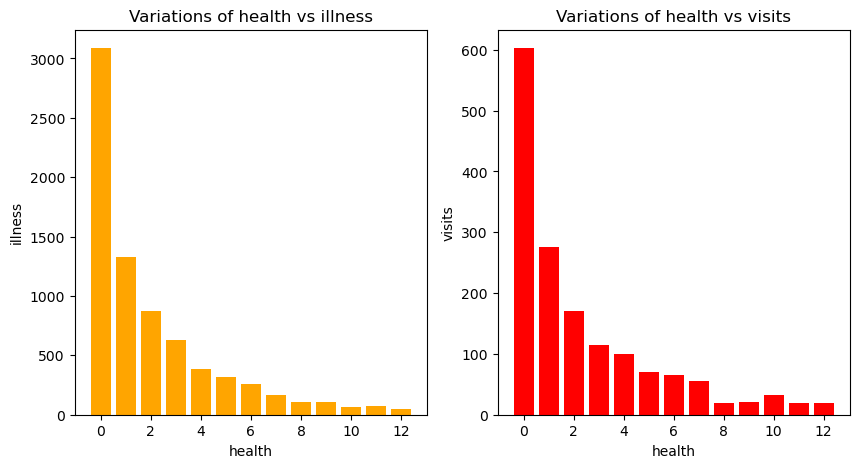

In [57]:
#subplpots showing variatons of health with illness and no.of visits of doctor
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax1.bar(df3.index,df3["illness"],color="orange");
ax1.set(title="Variations of health vs illness",
        xlabel="health",
        ylabel="illness") 

ax2.bar(df3.index,df3["visits"],color="red");
ax2.set(title="Variations of health vs visits",
        xlabel="health",
        ylabel="visits");  

In [58]:
df4=df.groupby("private").sum()
df4["type"]=[0,1]
df4

,visits,age,income,illness,reduced,health,freepoor,freerepat,nchronic,lchronic,type
private,,,,,,,,,,,
0,889,120397,142251.0,4308,2715,3797,222,1091,1123,374,0
1,677,90244,160409.0,3124,1758,2522,0,0,969,231,1


In [59]:
df5=df.groupby("freepoor").sum()
df5["type"]=[0,1]
df5

,visits,age,income,illness,reduced,health,private,freerepat,nchronic,lchronic,type
freepoor,,,,,,,,,,,
0,1531,205098,295969.0,7152,4302,5920,2298,1091,2037,579,0
1,35,5543,6691.0,280,171,399,0,0,55,26,1


In [60]:
df6=df.groupby("freerepat").sum()
df6["type"]=[0,1]
df6

,visits,age,income,illness,reduced,health,private,freepoor,nchronic,lchronic,type
freerepat,,,,,,,,,,,
0,1057,140208,270437.0,5278,3021,4684,2298,222,1484,368,0
1,509,70433,32223.0,2154,1452,1635,0,0,608,237,1


In [61]:
df6[df6["type"]==1]["visits"].values

array([509], dtype=int64)

In [62]:
data = {
    'private': [df4[df4["type"] == 0]["visits"].values[0], df4[df4["type"] == 1]["visits"].values[0]],
    'freepoor': [df5[df5["type"] == 0]["visits"].values[0], df5[df5["type"] == 1]["visits"].values[0]],
    'freerepat': [df6[df6["type"] == 0]["visits"].values[0], df6[df6["type"] == 1]["visits"].values[0]]
}
df6[df6["type"]==1]["visits"]
# Create a DataFrame from the data and transpose it
dff = pd.DataFrame(data, index=['0', '1']).T
dff["category"]=["private","freepoor","freerepat"]
dff

,0,1,category
private,889,677,private
freepoor,1531,35,freepoor
freerepat,1057,509,freerepat


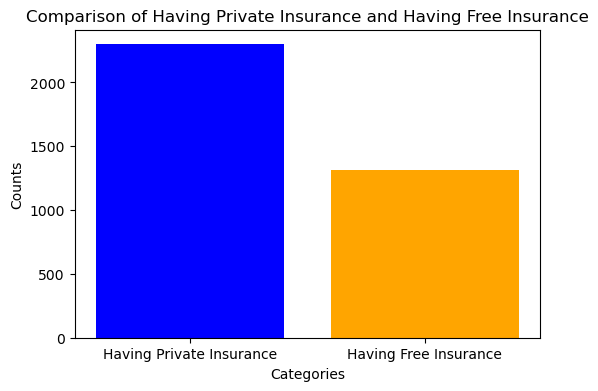

In [63]:
#Distribution people having private and free insurence 
having_private_insurence = df[df['private'] == 1].shape[0]
having_free_insurence = df[(df['freepoor'] == 1) | (df['freerepat'] == 1)].shape[0]
categories = ['Having Private Insurance', 'Having Free Insurance']
counts = [having_private_insurence, having_free_insurence]
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(categories, counts, color=['blue', 'orange'])
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Having Private Insurance and Having Free Insurance');

Text(0.5, 1.0, 'insurance type vs visits')

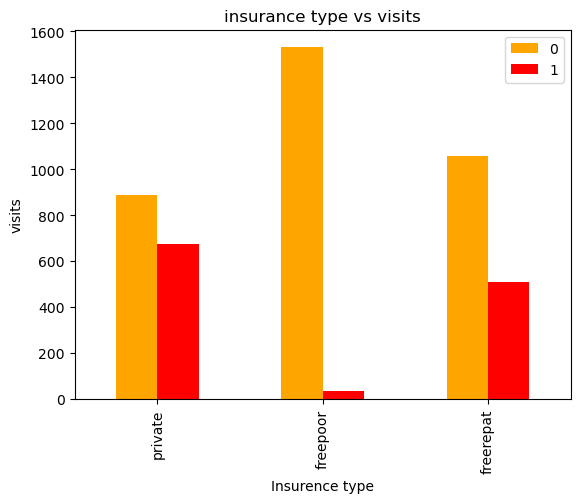

In [64]:
#No.of visits of the doctor according to the insurence type
import matplotlib.pyplot as plt
import pandas as pd
data = {
    'private': [df4[df4["type"] == 0]["visits"].values[0], df4[df4["type"] == 1]["visits"].values[0]],
    'freepoor': [df5[df5["type"] == 0]["visits"].values[0], df5[df5["type"] == 1]["visits"].values[0]],
    'freerepat': [df6[df6["type"] == 0]["visits"].values[0], df6[df6["type"] == 1]["visits"].values[0]]
}
df0 = pd.DataFrame(data, index=['0', '1']).T
ax = df0.plot(kind='bar',color=["orange","red"])
plt.xlabel('Insurence type')
plt.ylabel('visits')
plt.title('insurance type vs visits')

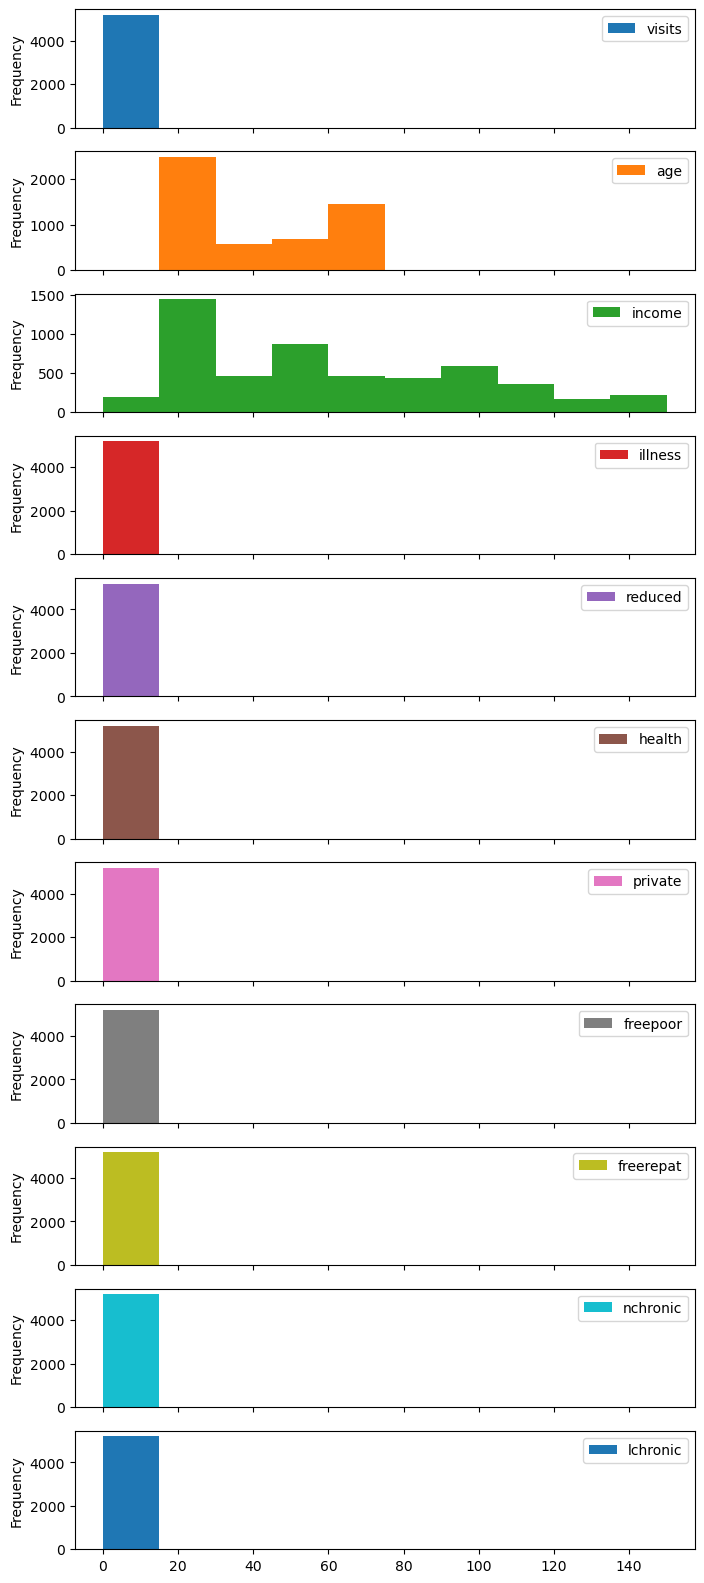

In [65]:
#boxplots of all numerical columns over same axis along with their frequency 
df.plot.hist(figsize=(8,20),subplots=True);

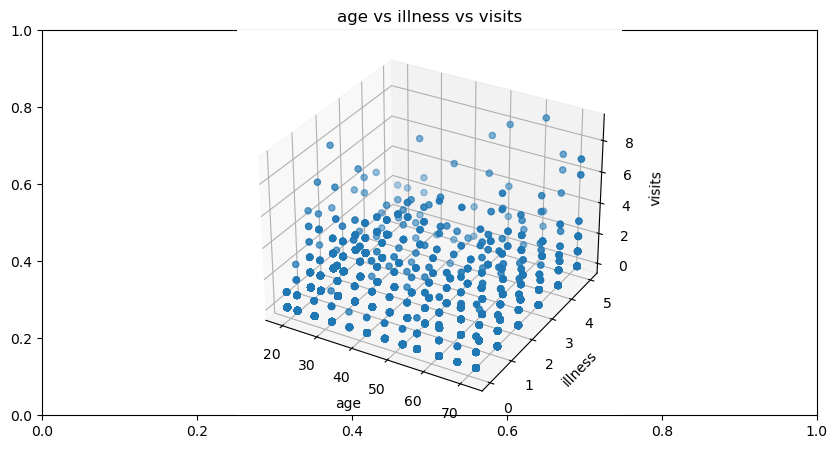

In [66]:
#Variation of age vs illness vs visits
from mpl_toolkits import mplot3d
fig,ax=plt.subplots(figsize=(10,5))
ax=plt.axes(projection="3d")
ax.scatter3D(df["age"],df["illness"],df["visits"])
ax.set(title="age vs illness vs visits",
      xlabel="age",
      ylabel="illness",
      zlabel="visits");


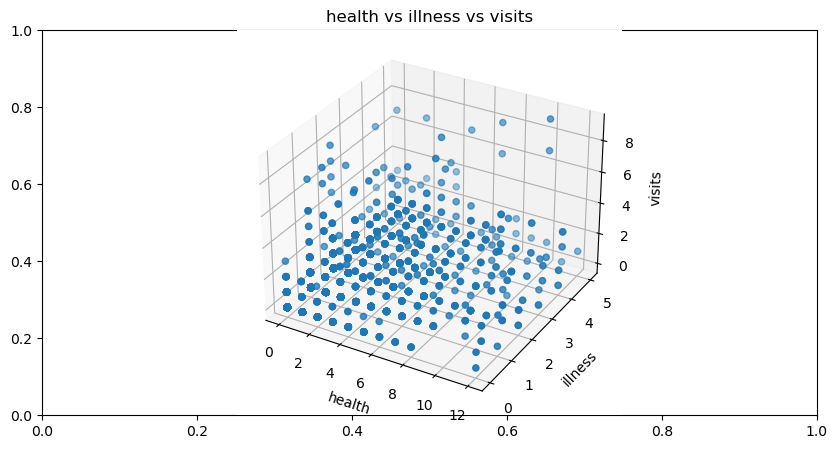

In [67]:
#Variation of health vs illness vs visits
from mpl_toolkits import mplot3d
fig,ax=plt.subplots(figsize=(10,5))
ax=plt.axes(projection="3d")
ax.scatter3D(df["health"],df["illness"],df["visits"])
ax.set(title="health vs illness vs visits",
      xlabel="health",
      ylabel="illness",
      zlabel="visits");

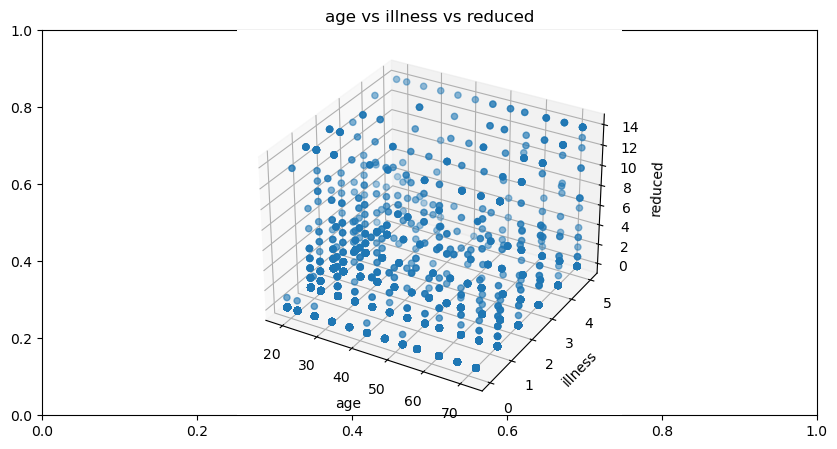

In [68]:
#Variation of age vs illness vs reduced
from mpl_toolkits import mplot3d
fig,ax=plt.subplots(figsize=(10,5))
ax=plt.axes(projection="3d")
ax.scatter3D(df["age"],df["illness"],df["reduced"])
ax.set(title="age vs illness vs reduced",
      xlabel="age",
      ylabel="illness",
      zlabel="reduced");

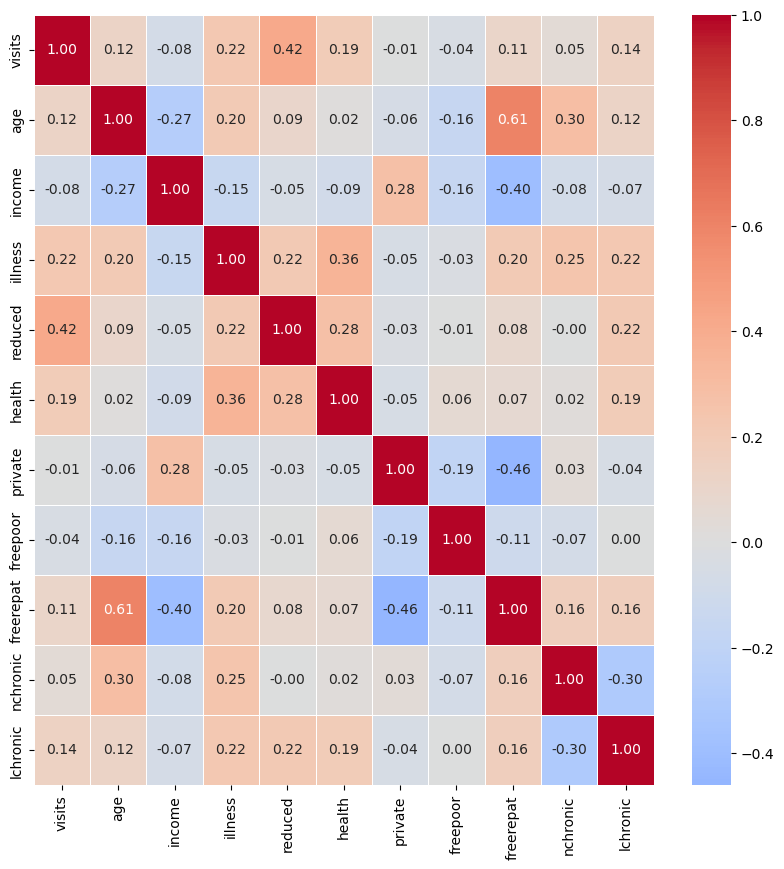

In [73]:
#Heatmap for correlation between the attributes.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.6,center=0);

## Insights

    Doctor has more number of female patients than male
    
    After a certain age illness increases the age 
    
    Icomes of males are higher than females
    
    Fmales has more illness,reduced activity,health compared to males  
    
    As health increases the illness and no.of doctor visits are decreasing
    
    People having private insurance are more than people having free insurance
    
    Only a few people are not having any type of insurance(either private or free)   